In [1]:
# File to use to test the main function, utility functions, and structure. Later will move changes to functions to separate files in utils folder.

In [2]:
#imports
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# import functions
from utils.AlpacaFunctions import get_historical_dataframe
from utils.data_process import return_rolling_averages
from utils.data_process import return_crossovers

In [4]:
# set ticker, start date, end date, timeframe
ticker = "TSLA"

today = pd.Timestamp.now(tz="America/New_York")

start_date = pd.Timestamp(today - pd.Timedelta(days=700)).isoformat()

end_date = today

timeframe = '1D'

In [5]:
df = pd.DataFrame(get_historical_dataframe(ticker, start_date, end_date, timeframe)[ticker])

In [6]:
volume_df = pd.DataFrame(df["volume"])

In [7]:
volume_df

,volume
time,
2020-02-13 00:00:00-05:00,24953651
2020-02-14 00:00:00-05:00,14271351
2020-02-18 00:00:00-05:00,14593786
2020-02-19 00:00:00-05:00,23657004
2020-02-20 00:00:00-05:00,16797173
...,...
2022-01-07 00:00:00-05:00,26528721
2022-01-10 00:00:00-05:00,28072524
2022-01-11 00:00:00-05:00,19336218


In [8]:
close_df = pd.DataFrame(df["close"])

In [9]:
close_df.head(20)

,close
time,
2020-02-13 00:00:00-05:00,803.8600
2020-02-14 00:00:00-05:00,799.9724
2020-02-18 00:00:00-05:00,858.6600
2020-02-19 00:00:00-05:00,916.9600
2020-02-20 00:00:00-05:00,899.1800
2020-02-21 00:00:00-05:00,901.0000
2020-02-24 00:00:00-05:00,833.1600
2020-02-25 00:00:00-05:00,799.1100
2020-02-26 00:00:00-05:00,778.8000


In [10]:
return_rolling_averages(close_df)

In [11]:
close_df.head(20)

,close,2,3,5,8,10,13,20,21,34,50,55,89,100,144,200
time,,,,,,,,,,,,,,,,
2020-02-13 00:00:00-05:00,803.8600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-14 00:00:00-05:00,799.9724,801.9162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-18 00:00:00-05:00,858.6600,829.3162,820.830800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-19 00:00:00-05:00,916.9600,887.8100,858.530800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-20 00:00:00-05:00,899.1800,908.0700,891.600000,855.72648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-21 00:00:00-05:00,901.0000,900.0900,905.713333,875.15448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-24 00:00:00-05:00,833.1600,867.0800,877.780000,881.79200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-25 00:00:00-05:00,799.1100,816.1350,844.423333,869.88200,851.487800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26 00:00:00-05:00,778.8000,788.9550,803.690000,842.25000,848.355300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
cross_df = return_crossovers(close_df)

In [13]:
cross_df.head(20)

,close to 2,close to 3,close to 5,close to 8,close to 10,close to 13,close to 20,close to 21,close to 34,close to 50,...,55 to 89,55 to 100,55 to 144,55 to 200,89 to 100,89 to 144,89 to 200,100 to 144,100 to 200,144 to 200
time,,,,,,,,,,,,,,,,,,,,,
2020-02-13 00:00:00-05:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-14 00:00:00-05:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-18 00:00:00-05:00,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-19 00:00:00-05:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-20 00:00:00-05:00,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-21 00:00:00-05:00,1,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-24 00:00:00-05:00,-1,0,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-25 00:00:00-05:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-26 00:00:00-05:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
pct_change_df = close_df.pct_change()

In [15]:
pct_change_df

,close,2,3,5,8,10,13,20,21,34,50,55,89,100,144,200
time,,,,,,,,,,,,,,,,
2020-02-13 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-14 00:00:00-05:00,-0.004836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-18 00:00:00-05:00,0.073362,0.034168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-19 00:00:00-05:00,0.067896,0.070533,0.045929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-20 00:00:00-05:00,-0.019390,0.022820,0.038518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-07 00:00:00-05:00,-0.035503,-0.028211,-0.037169,-0.005458,-0.007037,-0.003699,0.009180,0.001140,-0.001902,-0.001936,-0.000207,0.002759,0.003456,0.003906,0.003511,0.002444
2022-01-10 00:00:00-05:00,0.030548,-0.003074,-0.009232,-0.025573,-0.003122,-0.003254,0.008599,0.002017,0.002537,-0.002201,-0.000351,0.002813,0.003833,0.003976,0.003709,0.002770
2022-01-11 00:00:00-05:00,0.005792,0.017984,-0.000095,-0.015821,-0.000680,-0.002245,0.003967,0.004810,0.002202,-0.002564,-0.000928,0.002638,0.003874,0.004196,0.003649,0.002846


In [16]:
signals_input_df = pd.concat([pct_change_df, cross_df, volume_df], axis=1)

In [17]:
X = signals_input_df.dropna()

In [18]:
X

,close,2,3,5,8,10,13,20,21,34,...,55 to 100,55 to 144,55 to 200,89 to 100,89 to 144,89 to 200,100 to 144,100 to 200,144 to 200,volume
time,,,,,,,,,,,,,,,,,,,,,
2020-11-27 00:00:00-05:00,0.020470,0.026455,0.038800,0.032798,0.044678,0.036292,0.027194,0.019553,0.019201,0.010119,...,0,0,0,0,0,0,0,0,0,34800710
2020-11-30 00:00:00-05:00,-0.032898,-0.006484,0.006190,0.028254,0.030069,0.032140,0.025139,0.019543,0.016333,0.008215,...,0,0,0,0,0,0,0,0,0,56072877
2020-12-01 00:00:00-05:00,0.033029,-0.000486,0.006482,0.022655,0.023031,0.034531,0.026407,0.019838,0.020330,0.009068,...,0,0,0,0,0,0,0,0,0,37313883
2020-12-02 00:00:00-05:00,-0.028008,0.002014,-0.009756,0.004513,0.015908,0.023980,0.024045,0.015279,0.017009,0.006962,...,0,0,0,0,0,0,0,0,0,42857218
2020-12-03 00:00:00-05:00,0.043038,0.007010,0.015577,0.006694,0.023350,0.019628,0.027880,0.017883,0.016848,0.009302,...,0,0,0,0,0,0,0,0,0,38701927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-07 00:00:00-05:00,-0.035503,-0.028211,-0.037169,-0.005458,-0.007037,-0.003699,0.009180,0.001140,-0.001902,-0.001936,...,0,0,0,0,0,0,0,0,0,26528721
2022-01-10 00:00:00-05:00,0.030548,-0.003074,-0.009232,-0.025573,-0.003122,-0.003254,0.008599,0.002017,0.002537,-0.002201,...,0,0,0,0,0,0,0,0,0,28072524
2022-01-11 00:00:00-05:00,0.005792,0.017984,-0.000095,-0.015821,-0.000680,-0.002245,0.003967,0.004810,0.002202,-0.002564,...,0,0,0,0,0,0,0,0,0,19336218


In [19]:
# generate target signal. 1 = buy if next day will go up. 0 = sell if next day will go down.

In [20]:
# next few cells are to compare to get the right signal syntax below
close_df["close"]

time
2020-02-13 00:00:00-05:00     803.8600
2020-02-14 00:00:00-05:00     799.9724
2020-02-18 00:00:00-05:00     858.6600
2020-02-19 00:00:00-05:00     916.9600
2020-02-20 00:00:00-05:00     899.1800
                               ...    
2022-01-07 00:00:00-05:00    1026.9000
2022-01-10 00:00:00-05:00    1058.2700
2022-01-11 00:00:00-05:00    1064.4000
2022-01-12 00:00:00-05:00    1106.8800
2022-01-13 00:00:00-05:00    1077.7000
Name: close, Length: 485, dtype: float64

In [21]:
close_df["close"].shift()

time
2020-02-13 00:00:00-05:00          NaN
2020-02-14 00:00:00-05:00     803.8600
2020-02-18 00:00:00-05:00     799.9724
2020-02-19 00:00:00-05:00     858.6600
2020-02-20 00:00:00-05:00     916.9600
                               ...    
2022-01-07 00:00:00-05:00    1064.7000
2022-01-10 00:00:00-05:00    1026.9000
2022-01-11 00:00:00-05:00    1058.2700
2022-01-12 00:00:00-05:00    1064.4000
2022-01-13 00:00:00-05:00    1106.8800
Name: close, Length: 485, dtype: float64

In [22]:
close_df["close"] > close_df["close"].shift()

time
2020-02-13 00:00:00-05:00    False
2020-02-14 00:00:00-05:00    False
2020-02-18 00:00:00-05:00     True
2020-02-19 00:00:00-05:00     True
2020-02-20 00:00:00-05:00    False
                             ...  
2022-01-07 00:00:00-05:00    False
2022-01-10 00:00:00-05:00     True
2022-01-11 00:00:00-05:00     True
2022-01-12 00:00:00-05:00     True
2022-01-13 00:00:00-05:00    False
Name: close, Length: 485, dtype: bool

In [23]:
# this should the proper signal
# to double check if this is working right, look at the tail end. should give 0 if the following day it goes down, 1 if the following day will go up.
y_signal = ((close_df["close"] > close_df["close"].shift()).shift(-1))*1

In [24]:
y_signal

time
2020-02-13 00:00:00-05:00      0
2020-02-14 00:00:00-05:00      1
2020-02-18 00:00:00-05:00      1
2020-02-19 00:00:00-05:00      0
2020-02-20 00:00:00-05:00      1
                            ... 
2022-01-07 00:00:00-05:00      1
2022-01-10 00:00:00-05:00      1
2022-01-11 00:00:00-05:00      1
2022-01-12 00:00:00-05:00      0
2022-01-13 00:00:00-05:00    NaN
Name: close, Length: 485, dtype: object

In [25]:
y = pd.DataFrame(y_signal).loc[X.index]

In [26]:
y.iloc[-1]=0

In [27]:
y

,close
time,
2020-11-27 00:00:00-05:00,0
2020-11-30 00:00:00-05:00,1
2020-12-01 00:00:00-05:00,0
2020-12-02 00:00:00-05:00,1
2020-12-03 00:00:00-05:00,1
...,...
2022-01-07 00:00:00-05:00,1
2022-01-10 00:00:00-05:00,1
2022-01-11 00:00:00-05:00,1


In [28]:
# check if the output is as expected - above y signal should generate a buy signal if tomorrow will go up, sell if tomorrow will go down
close_df["close"].tail(10)

time
2021-12-31 00:00:00-05:00    1057.2400
2022-01-03 00:00:00-05:00    1199.6500
2022-01-04 00:00:00-05:00    1149.6300
2022-01-05 00:00:00-05:00    1087.6201
2022-01-06 00:00:00-05:00    1064.7000
2022-01-07 00:00:00-05:00    1026.9000
2022-01-10 00:00:00-05:00    1058.2700
2022-01-11 00:00:00-05:00    1064.4000
2022-01-12 00:00:00-05:00    1106.8800
2022-01-13 00:00:00-05:00    1077.7000
Name: close, dtype: float64

In [29]:
# train test split 100 days back
X_train=X[:-100]

In [30]:
X_test=X[-100:]

In [31]:
y_train=y[:-100]

In [32]:
y_test=y[-100:]

In [33]:
scaler = StandardScaler()

In [34]:
X_scaler = scaler.fit(X_train)

In [35]:
X_train_scaled = scaler.transform(X_train)

In [36]:
X_test_scaled = scaler.transform(X_test)

In [37]:
#set up neural network
number_output_neurons = 1

In [38]:
number_input_features=X_train.shape[1]

In [39]:
hidden_nodes_layer1= (number_input_features + number_output_neurons)//2

In [40]:
hidden_nodes_layer2= (hidden_nodes_layer1 + number_output_neurons)//2

In [175]:
# begin model initialization and fitting

In [176]:
model=Sequential()

In [177]:
model.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation = "relu"))

In [178]:
model.add(Dense(units=hidden_nodes_layer2, activation = "relu"))

In [179]:
model.add(Dense(units=1, activation = "sigmoid"))

In [180]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 69)                9522      
                                                                 
 dense_10 (Dense)            (None, 35)                2450      
                                                                 
 dense_11 (Dense)            (None, 1)                 36        
                                                                 
Total params: 12,008
Trainable params: 12,008
Non-trainable params: 0
_________________________________________________________________


In [181]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [182]:
X_train_scaled_df = pd.DataFrame(X_train_scaled)

In [183]:
X_train_scaled_df

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,136
0,0.533785,1.092042,2.052371,2.179365,3.608178,3.027428,2.413584,1.948255,1.951656,1.097467,...,-0.042486,0.0,0.0,0.0,0.0,0.0,0.0,0.042486,0.0,0.345732
1,-0.986009,-0.341842,0.264760,1.863009,2.376971,2.659957,2.214646,1.947086,1.618213,0.828610,...,-0.042486,0.0,0.0,0.0,0.0,0.0,0.0,0.042486,0.0,1.843793
2,0.891408,-0.080732,0.280773,1.473235,1.783825,2.871606,2.337328,1.980687,2.083033,0.949134,...,-0.042486,0.0,0.0,0.0,0.0,0.0,0.0,0.042486,0.0,0.522719
3,-0.846754,0.028119,-0.609364,0.210132,1.183552,1.937924,2.108724,1.462646,1.696770,0.651696,...,-0.042486,0.0,0.0,0.0,0.0,0.0,0.0,0.042486,0.0,0.913100
4,1.176451,0.245603,0.779328,0.361974,1.810667,1.552892,2.479918,1.758458,1.678139,0.982164,...,-0.042486,0.0,0.0,0.0,0.0,0.0,0.0,0.042486,0.0,0.620469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,-0.891258,-1.654529,-1.527474,-0.971139,-0.881967,-0.732937,-0.340108,-0.227552,-0.123576,-0.423076,...,-0.042486,0.0,0.0,0.0,0.0,0.0,0.0,0.042486,0.0,-0.548678
181,0.952892,0.041526,-0.816056,-0.473139,-0.301069,-0.455370,-0.200800,0.008381,-0.046782,-0.273182,...,-0.042486,0.0,0.0,0.0,0.0,0.0,0.0,0.042486,0.0,-0.795998
182,-0.702748,0.184883,-0.415084,-1.078727,-0.761716,-0.702297,-0.601243,-0.072505,-0.133863,-0.358928,...,-0.042486,0.0,0.0,0.0,0.0,0.0,0.0,0.042486,0.0,-1.181375
183,0.230765,-0.353458,0.309952,-0.858501,-0.609391,-0.422085,-0.534624,0.029521,-0.031546,-0.324294,...,7.817411,0.0,0.0,0.0,0.0,0.0,0.0,0.042486,0.0,-1.153549


In [184]:
y_train["close"]

time
2020-11-27 00:00:00-05:00    0
2020-11-30 00:00:00-05:00    1
2020-12-01 00:00:00-05:00    0
2020-12-02 00:00:00-05:00    1
2020-12-03 00:00:00-05:00    1
                            ..
2021-08-17 00:00:00-04:00    1
2021-08-18 00:00:00-04:00    0
2021-08-19 00:00:00-04:00    1
2021-08-20 00:00:00-04:00    1
2021-08-23 00:00:00-04:00    1
Name: close, Length: 185, dtype: object

In [185]:
X_train_scaled_array=np.asarray(X_train_scaled).astype(np.int)

y_train_array=np.asarray(y_train).astype(np.int)

y_test_array=np.asarray(y_test).astype(np.int)

C:\Users\phods\anaconda3\envs\dev2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
C:\Users\phods\anaconda3\envs\dev2\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

In [186]:
fit_model = model.fit(X_train_scaled_array, y_train_array, validation_split=.3, epochs=20)

Epoch 1/20
5/5 [==============================] - 1s 99ms/step - loss: 0.7801 - accuracy: 0.4961 - val_loss: 0.8835 - val_accuracy: 0.4286
Epoch 2/20
5/5 [==============================] - 0s 28ms/step - loss: 0.6740 - accuracy: 0.6124 - val_loss: 0.8682 - val_accuracy: 0.4286
Epoch 3/20
5/5 [==============================] - 0s 25ms/step - loss: 0.6074 - accuracy: 0.6822 - val_loss: 0.8574 - val_accuracy: 0.4643
Epoch 4/20
5/5 [==============================] - 0s 27ms/step - loss: 0.5544 - accuracy: 0.7442 - val_loss: 0.8523 - val_accuracy: 0.4643
Epoch 5/20
5/5 [==============================] - 0s 27ms/step - loss: 0.5123 - accuracy: 0.8372 - val_loss: 0.8511 - val_accuracy: 0.4821
Epoch 6/20
5/5 [==============================] - 0s 28ms/step - loss: 0.4795 - accuracy: 0.8682 - val_loss: 0.8524 - val_accuracy: 0.4821
Epoch 7/20
5/5 [==============================] - 0s 28ms/step - loss: 0.4459 - accuracy: 0.8992 - val_loss: 0.8502 - val_accuracy: 0.5000
Epoch 8/20
5/5 [===========

In [187]:
trained_predictions = pd.DataFrame((model.predict(X_test_scaled)).round(), index=y_test.index)

In [188]:
trained_predictions

,0
time,
2021-08-24 00:00:00-04:00,0.0
2021-08-25 00:00:00-04:00,1.0
2021-08-26 00:00:00-04:00,1.0
2021-08-27 00:00:00-04:00,1.0
2021-08-30 00:00:00-04:00,1.0
...,...
2022-01-07 00:00:00-05:00,0.0
2022-01-10 00:00:00-05:00,1.0
2022-01-11 00:00:00-05:00,0.0


In [189]:
y_test

,close
time,
2021-08-24 00:00:00-04:00,1
2021-08-25 00:00:00-04:00,0
2021-08-26 00:00:00-04:00,1
2021-08-27 00:00:00-04:00,1
2021-08-30 00:00:00-04:00,1
...,...
2022-01-07 00:00:00-05:00,1
2022-01-10 00:00:00-05:00,1
2022-01-11 00:00:00-05:00,1


<AxesSubplot:xlabel='time'>

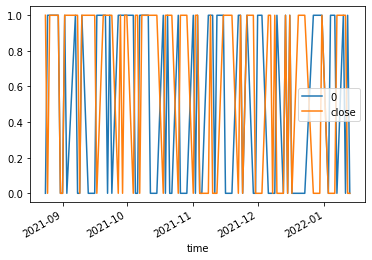

In [190]:
ax = trained_predictions.plot()
y_test.plot(ax=ax)

In [191]:
# this code gets the cumulative amount of purchase/buy signals
((trained_predictions -.5)*2).cumsum()

,0
time,
2021-08-24 00:00:00-04:00,-1.0
2021-08-25 00:00:00-04:00,0.0
2021-08-26 00:00:00-04:00,1.0
2021-08-27 00:00:00-04:00,2.0
2021-08-30 00:00:00-04:00,3.0
...,...
2022-01-07 00:00:00-05:00,-2.0
2022-01-10 00:00:00-05:00,-1.0
2022-01-11 00:00:00-05:00,-2.0


In [192]:
trained_predictions.value_counts()

0.0    51
1.0    49
dtype: int64

In [193]:
y_test.value_counts()

close
1        61
0        39
dtype: int64

In [194]:
y_train.value_counts()

close
1        95
0        90
dtype: int64

In [195]:
from sklearn.metrics import accuracy_score

In [196]:
accuracy_score(trained_predictions, y_test_array)

0.38

In [197]:
# begin test of output. 
# start with gain if you bought all day 1 of test period, sold all at end
# first test multiplies signal by pct change. 
# second test takes into account a starting amount of money, buys and sells a certain amount per day.
# third test keeps track of money available per day and puts a stop to buying when run out
# fourth test sells all if money is run out on next sell signal.
# fifth test sells all on next sell signal if available money is down to a third of the amount initially available.
# try to add feature to prevent any short selling when shares not available.

In [198]:
close_df[-100:]["close"]

time
2021-08-24 00:00:00-04:00     708.4794
2021-08-25 00:00:00-04:00     711.0100
2021-08-26 00:00:00-04:00     701.1500
2021-08-27 00:00:00-04:00     711.7500
2021-08-30 00:00:00-04:00     730.8300
                               ...    
2022-01-07 00:00:00-05:00    1026.9000
2022-01-10 00:00:00-05:00    1058.2700
2022-01-11 00:00:00-05:00    1064.4000
2022-01-12 00:00:00-05:00    1106.8800
2022-01-13 00:00:00-05:00    1077.7000
Name: close, Length: 100, dtype: float64

In [199]:
# gain if you bought all day 1 and sold all at end of test period
close_df.iloc[-1]["close"]/close_df.iloc[-100]["close"]

1.5211451455045835

In [200]:
y_test.shape[0]

100

In [201]:
y_train

,close
time,
2020-11-27 00:00:00-05:00,0
2020-11-30 00:00:00-05:00,1
2020-12-01 00:00:00-05:00,0
2020-12-02 00:00:00-05:00,1
2020-12-03 00:00:00-05:00,1
...,...
2021-08-17 00:00:00-04:00,1
2021-08-18 00:00:00-04:00,0
2021-08-19 00:00:00-04:00,1


In [202]:
# get a read on how many trades above or below zero will be in the trade signal cumulative output
print(((y_train - .5) * 2).cumsum().max())
print(((y_train - .5) * 2).cumsum().min())

close    15.0
dtype: object
close   -1.0
dtype: object


In [203]:
# initiate start money amount and 0 shares held.
start_money = 10000
shares = 0
shares_df = pd.DataFrame(np.zeros(shape=y_test.shape[0]), index=y_test.index)
money_on_hand_df = pd.DataFrame(np.zeros(shape=y_test.shape[0]), index=y_test.index)
money_on_hand = start_money

In [204]:
# get appropriate daily buy/sell amount per start money
trade_amount = start_money / ((y_train - .5) * 2).cumsum().max() #conservative amount expecting to not go under on money
# trade_amount=3000 # a more aggressive amount expecting to go short on money or shares

In [205]:
trade_amount

close    666.666667
dtype: object

In [206]:
trained_predictions[0]

time
2021-08-24 00:00:00-04:00    0.0
2021-08-25 00:00:00-04:00    1.0
2021-08-26 00:00:00-04:00    1.0
2021-08-27 00:00:00-04:00    1.0
2021-08-30 00:00:00-04:00    1.0
                            ... 
2022-01-07 00:00:00-05:00    0.0
2022-01-10 00:00:00-05:00    1.0
2022-01-11 00:00:00-05:00    0.0
2022-01-12 00:00:00-05:00    1.0
2022-01-13 00:00:00-05:00    0.0
Name: 0, Length: 100, dtype: float32

In [207]:
# test to add up all exercises, no stops or changes to purchase/sell amount in place.

# for day in range(len(trained_predictions)):
#     shares_df.iloc[day][0] = shares
#     money_on_hand_df.iloc[day][0] = money_on_hand
#     if trained_predictions.iloc[day][0] == 0:
#         shares -= trade_amount / close_df.iloc[day]["close"]
#         money_on_hand += trade_amount
#     elif trained_predictions.iloc[day][0] == 1:
#         shares += trade_amount / close_df.iloc[day]["close"]
#         money_on_hand -= trade_amount

In [215]:
# alternate test to add up all exercises, stops in place to prevent negative money or shares.

for day in range(len(trained_predictions)):
    shares_df.iloc[day][0] = shares
    money_on_hand_df.iloc[day][0] = money_on_hand
    if (trained_predictions.iloc[day][0] == 0) & (shares - trade_amount / close_df.iloc[day]["close"] >= 0)["close"]:
        shares -= trade_amount / close_df.iloc[day]["close"]
        money_on_hand += trade_amount
    elif (trained_predictions.iloc[day][0] == 1) & (money_on_hand - trade_amount >= 0):
        shares += trade_amount / close_df.iloc[day]["close"]
        money_on_hand -= trade_amount

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [214]:
trained_predictions.iloc[day][0] == 0

True

In [210]:
shares_df

,0
time,
2021-08-24 00:00:00-04:00,0.0
2021-08-25 00:00:00-04:00,0.0
2021-08-26 00:00:00-04:00,0.0
2021-08-27 00:00:00-04:00,0.0
2021-08-30 00:00:00-04:00,0.0
...,...
2022-01-07 00:00:00-05:00,0.0
2022-01-10 00:00:00-05:00,0.0
2022-01-11 00:00:00-05:00,0.0


In [125]:
# check lowest and highest amount of shares held at any one time in test
print(shares_df.min())
print(shares_df.max())

0   -6.708856
dtype: float64
0    5.963483
dtype: float64


In [126]:
# check lowest and highest amount of money held at any one time in test
print(money_on_hand_df.min())
print(money_on_hand_df.max())

0    5333.333333
dtype: float64
0    16666.666667
dtype: float64


In [127]:
money_on_hand_df

,0
time,
2021-08-24 00:00:00-04:00,10000.000000
2021-08-25 00:00:00-04:00,10666.666667
2021-08-26 00:00:00-04:00,11333.333333
2021-08-27 00:00:00-04:00,10666.666667
2021-08-30 00:00:00-04:00,11333.333333
...,...
2022-01-07 00:00:00-05:00,13333.333333
2022-01-10 00:00:00-05:00,12666.666667
2022-01-11 00:00:00-05:00,12000.000000


In [128]:
money_on_hand_df.min()

0    5333.333333
dtype: float64

<AxesSubplot:xlabel='time'>

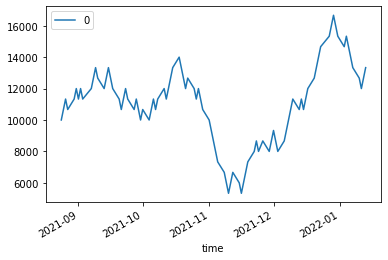

In [129]:
money_on_hand_df.plot()

<AxesSubplot:xlabel='time'>

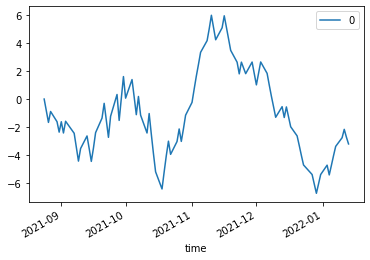

In [130]:
shares_df.plot()

In [131]:
value_of_shares_df=pd.DataFrame(shares_df[0].loc[:]*close_df.loc[:]["close"])

<AxesSubplot:xlabel='time'>

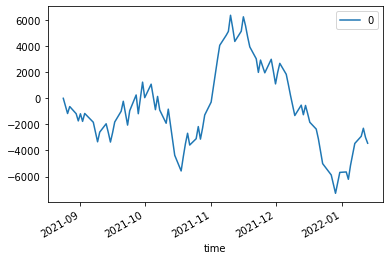

In [132]:
value_of_shares_df.plot()

In [133]:
value_of_shares_df

,0
time,
2020-02-13 00:00:00-05:00,NaN
2020-02-14 00:00:00-05:00,NaN
2020-02-18 00:00:00-05:00,NaN
2020-02-19 00:00:00-05:00,NaN
2020-02-20 00:00:00-05:00,NaN
...,...
2022-01-07 00:00:00-05:00,-3460.993515
2022-01-10 00:00:00-05:00,-2912.862306
2022-01-11 00:00:00-05:00,-2295.903229


In [134]:
value_on_hand_df = value_of_shares_df[0] + money_on_hand_df[0]

In [135]:
value_on_hand_df

time
2020-02-13 00:00:00-05:00            NaN
2020-02-14 00:00:00-05:00            NaN
2020-02-18 00:00:00-05:00            NaN
2020-02-19 00:00:00-05:00            NaN
2020-02-20 00:00:00-05:00            NaN
                                ...     
2022-01-07 00:00:00-05:00    9872.339819
2022-01-10 00:00:00-05:00    9753.804361
2022-01-11 00:00:00-05:00    9704.096771
2022-01-12 00:00:00-05:00    9668.677729
2022-01-13 00:00:00-05:00    9890.332835
Name: 0, Length: 485, dtype: float64

<AxesSubplot:xlabel='time'>

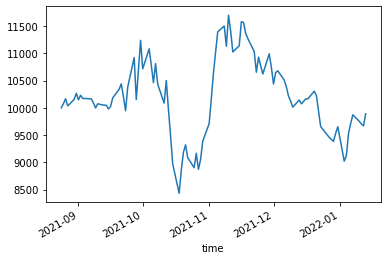

In [136]:
value_on_hand_df.plot()

In [137]:
money_on_hand

close    12666.666667
dtype: object

In [138]:
shares

close   -2.715044
dtype: object

In [139]:
end_money = money_on_hand + shares * close_df.iloc[-1]["close"]

In [140]:
end_money

close    9740.663964
dtype: object

In [141]:
end_money/start_money

close    0.974066
dtype: object

In [464]:
# # pseudocode outline:

# function to get price history - args are stock ticker/s, amount of days
# 	call alpaca
# 	return dataframe

# function to get twitter history
# 	possibly filter for repeated tweets
# 	return signal

# function to get news history
# 	return signal

# function to get reddit history
# 	return signal

# function to get general sentiment signals history
# 	call function to get twitter history
# 	call function to get news history
# 	call function to get reddit history
# 	return combined dataframe of signals


# function to get sentiment signals history of specific stock - arg is stock ticker
# 	call function to get twitter history
# 	call function to get news history
# 	call function to get reddit history
# 	return combined dataframe of signals

# function to run machine learning - arg is combined signals and stock history
# 	add additional columns for each signal for a daily percent change and a 5 day moving average a 100 day moving average
# 	scale
# 	train/test split
# 	try a few machine learning possibilities, svm, adaboost, possibly neural - try to guess if it will go up or down the following day

# 	try the following : reduce overfitting with early stopping
	
# 	neural - y is determined by whether it goes up or down the following day. two output neurons, highest one is selected to make signal.
# 	check amount correct, amount incorrect, and difference between actual and strategy.	

# 	neural 2nd stage - train only on the indexes which were incorrectly predicted.

	




# 	return buy/sell signal

# make function to calculate returns:
# don't use the function that just multiplies the signals by pct_return
# track the amount spent on each buy and amount returned on each sell.
# plot the total amount invested at any one time.
# possibly put a cutoff if no more money is available.
# possibly put a stop if unable to sell short.
# at the end, sell all or buy all short positions, get end result.
# compare to if the full amount initially available was all spent to purchase the stock at
# the beginning of the test period.


# Main function:
# 	determine which stocks to pull, one or many

# 	call function to get price history

# 	call function to get general sentiment signals history

# 	call function to get sentiment signals history for specific stock/s

# 	call function to run machine learning on the price history and signals

# 	output graphs





# terms to use in signal search for general:
# green
# renewable
# environment
# climate
# global warming
# climate crisis
# natural disaster
